# Homework 1

### Q1.

Let $A$ be the event of passing the class, and $B$ be the event of answering the question quickly. Want $P(A | B)$.

By Bayes' theorem:
$$P(A | B) = \frac{P(B | A) P(A)}{P(B)}.$$

By law of total probability:
$$P(B) = P(B | A) P(A) + P(B | A^c) P(A^c),$$

Substituting the values:
- $P(A) = 0.9$, $P(A^c) = 0.1$,
- $P(B | A) = 0.6$, $P(B | A^c) = 0.3$.

Then:
$$P(B) = (0.6)(0.9) + (0.3)(0.1) = 0.54 + 0.03 = 0.57.$$

$$P(A | B) = \frac{(0.6)(0.9)}{0.57} = \frac{0.54}{0.57} \approx 0.947.$$

Thus, $P(A | B) \approx 0.947$.


&nbsp;

&nbsp;


### Q2.

*Multinomial* **likelihood**:
$$
p(x | \boldsymbol{\theta}, n) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i}.
$$

*Dirichlet* **prior**:
$$
p(\boldsymbol{\theta} | \boldsymbol{\alpha}) = \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^k \theta_i^{\alpha_i - 1},
$$
where $ B(\boldsymbol{\alpha}) $ is the multivariate Beta function:
$$
B(\boldsymbol{\alpha}) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}.
$$

By Bayes' theorem, the posterior is:

$$
p(\boldsymbol{\theta} | x, n, \boldsymbol{\alpha}) = \frac{n!}{x_1! x_2! \cdots x_k! \cdot B(\boldsymbol{\alpha}) \cdot p(x)} \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}.
$$

Getting rid of the constant factor:
$$
p(\boldsymbol{\theta} | x, n, \boldsymbol{\alpha}) \propto \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}.
$$

This matches the kernel of a Dirichlet distribution:
$$
p(\boldsymbol{\theta} | x, n, \boldsymbol{\alpha}) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_k + x_k).
$$


&nbsp;

&nbsp;





### Q3.

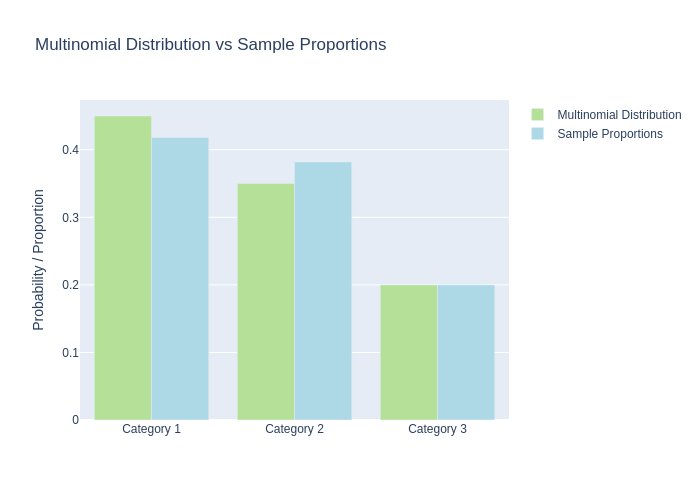

In [25]:
import numpy as np
from scipy.stats import dirichlet, multinomial
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Generate a sample of size 500 from a three-category multinomial distribution, with parameters (0.45, 0.35, 0.20)
categories = 3
n_trials = 500
probabilities = [0.45, 0.35, 0.20]  # Probabilities for each category
sample = multinomial.rvs(n=n_trials, p=probabilities, size=1)[0]

# Visualize the multinomial sample
fig_multinomial = go.Figure()
fig_multinomial.add_trace(go.Bar(
    x=["Category 1", "Category 2", "Category 3"],
    y=probabilities,
    name="Multinomial Distribution",
    marker=dict(color='#B4E197')
))
fig_multinomial.add_trace(go.Bar(
    x=["Category 1", "Category 2", "Category 3"],
    y=sample / n_trials,
    name="Sample Proportions",
    marker=dict(color='#ADD8E6')
))
fig_multinomial.update_layout(
    title="Multinomial Distribution vs Sample Proportions",
    yaxis_title="Probability / Proportion",
    barmode="group"
)
fig_multinomial.show('png')

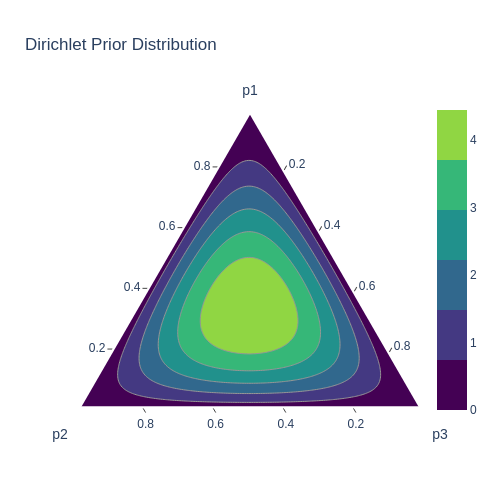

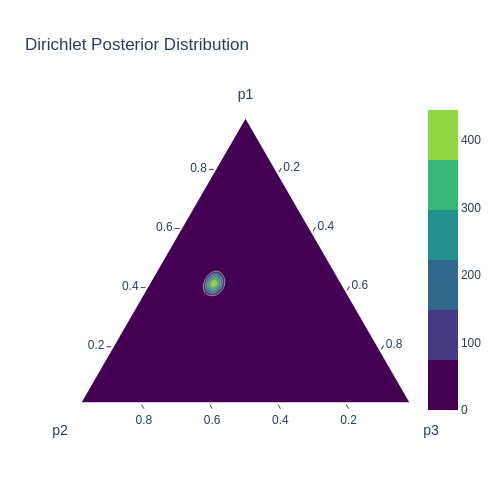

In [34]:
def generate_2d_simplex_grid(resolution=100):
    p1 = np.linspace(0, 1, resolution)
    p2 = np.linspace(0, 1, resolution)
    p1, p2 = np.meshgrid(p1, p2)  # Create a grid
    p3 = 1 - p1 - p2
    mask = (p3 >= 0) & (p3 <= 1)
    p1, p2, p3 = p1[mask], p2[mask], p3[mask]  # Filter valid points
    return np.c_[p1, p2, p3]

def validate_simplex(points, tol=1e-10):
    points = np.maximum(points, 0)  # Set negative values to 0
    points /= points.sum(axis=1, keepdims=True)  # Normalize to sum to 1
    return points

# Generate a grid for the simplex and validate
p = generate_2d_simplex_grid(resolution=100)
p = validate_simplex(p)

# Dirichlet prior and posterior
alpha_prior = np.array([2,2,2])  # Symmetric prior
alpha_posterior = alpha_prior + sample  # Update with multinomial sample

# Compute Dirichlet PDF values for the prior and posterior
prior_densities = dirichlet.pdf(p.T, alpha_prior)
posterior_densities = dirichlet.pdf(p.T, alpha_posterior)

# Visualize Dirichlet prior
fig_prior = ff.create_ternary_contour(
    p.T,
    prior_densities,
    ncontours=5,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    colorscale='Viridis',
    showscale=True,
)
fig_prior.update_layout(title="Dirichlet Prior Distribution")
fig_prior.show('png')


# Visualize Dirichlet posterior
fig_posterior = ff.create_ternary_contour(
    p.T,
    posterior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    colorscale='Viridis',
    showscale=True,
)
fig_posterior.update_layout(title="Dirichlet Posterior Distribution")
fig_posterior.show('png')
